In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import plotly_express as px
import plotly.graph_objects as go
import joblib
import os

pal=sns.color_palette("plasma_r", 70).as_hex()[2:]
temp = {
    'layout': go.Layout(font={'family': "Franklin Gothic", 'size': 12}, width=800)
}
colors=px.colors.qualitative.Plotly
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文

warnings.filterwarnings('ignore')

d:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
d:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
d:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows', 50)

target = ['EF', 'LN(EF)'] # 预测的目标
# data_type = ['Maize', 'RICE', 'Vegetable', 'Wheat']
data_name = 'Wheat' # 输入数据名

data_path = f'data/data_new/升温1.5/{data_name}+1.5度.xlsx' # 输入数据路径

output_file = 'output/EF_LNEF_N2O_LNRN2O/'
save_file = f'{output_file}/升温1.5' # 输出数据文件夹
os.makedirs(save_file, exist_ok=True)

In [3]:
data_all = pd.read_excel(data_path)

In [4]:
data_all

,OBJECTID,Longitude,Latitude,Crop type,Sand,Silt(%),Clay (%),BD,pH,SOC (%),TN (%),C/N,CEC,MAT (°C),MAP (mm),BNE,N application
0,1,-74.708333,-50.958333,3,52,28,20,1.29,7.1,1.319,0.158,10,14,8.960834,2641.540039,1,0.554
1,2,-74.541667,-50.958333,3,52,28,20,1.29,7.1,1.319,0.158,10,14,8.960834,2641.540039,1,0.554
2,3,-74.458333,-50.958333,3,52,28,20,1.29,7.1,1.319,0.158,10,14,8.822500,2458.050049,1,0.674
3,4,-74.125000,-50.958333,3,52,28,20,1.29,7.1,1.319,0.158,10,14,8.822500,2458.050049,1,0.674
4,5,-74.041667,-50.958333,3,52,28,20,1.29,7.1,1.319,0.158,10,14,8.822500,2458.050049,1,0.674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670021,687506,26.041667,64.125000,3,54,40,6,1.08,4.7,7.217,0.400,18,25,4.915833,615.700012,1,6.505
670022,687507,26.458333,64.125000,3,54,40,6,1.08,4.7,7.217,0.400,18,25,4.915833,615.700012,1,6.505
670023,687508,26.708333,64.125000,3,54,40,6,1.08,4.7,7.217,0.400,18,25,4.850833,652.049988,1,8.962
670024,687509,26.958333,64.125000,3,54,40,6,1.08,4.7,7.217,0.400,18,25,4.850833,652.049988,1,8.962


In [5]:
geograpy_factors = ['Longitude', 'Latitude']
catetory_factors = ['Crop type']
numeric_factors = ['Sand', 'Silt(%)', 'Clay (%)', 'SOC (%)', 'TN (%)', 'C/N', 'pH', 'BD', 'CEC', 'N application', 'BNE', 'MAT (°C)', 'MAP (mm)']


In [6]:
data_all.replace(["nan", 'Nan', 'NaN', 'NAN', 'None', 'not specified'], np.nan, inplace=True)
input_cols = catetory_factors + numeric_factors
data = data_all[input_cols]
print(data.shape)
# 观察有没有异常值
data.describe()

(670026, 14)


,Crop type,Sand,Silt(%),Clay (%),SOC (%),TN (%),C/N,pH,BD,CEC,N application,BNE,MAT (°C),MAP (mm)
count,670026.0,670026.000000,670026.000000,670026.000000,670026.000000,670026.000000,670026.000000,670026.000000,670026.000000,670026.000000,646194.000000,670026.0,670026.000000,670008.000000
mean,3.0,45.009776,32.885894,22.104330,2.292179,0.172005,11.782579,6.414894,1.363141,17.331224,12.728133,1.0,15.920745,824.120620
std,0.0,16.154040,11.940398,10.118015,4.644687,0.187849,2.562878,1.015042,0.182449,11.704263,20.784770,0.0,8.567600,520.423868
min,3.0,8.000000,4.000000,2.000000,0.169000,0.018000,8.000000,4.000000,0.110000,2.000000,0.001000,1.0,-6.773334,0.370000
25%,3.0,34.000000,26.000000,16.000000,0.970000,0.095000,10.000000,5.700000,1.300000,12.000000,0.396000,1.0,8.869167,459.960022
50%,3.0,42.000000,33.000000,20.000000,1.561000,0.141000,11.000000,6.400000,1.400000,16.000000,3.644000,1.0,15.946667,669.520020
75%,3.0,53.000000,42.000000,26.000000,2.200000,0.194000,12.000000,7.100000,1.470000,20.000000,15.949000,1.0,23.419167,1111.440063
max,3.0,94.000000,67.000000,65.000000,49.680000,2.348000,29.000000,9.000000,1.760000,105.000000,220.977005,1.0,32.847500,5292.839844


In [7]:
# 利用方差检验法检查异常值
def find_outlines_by_3segama(df, fea):
    data_std = np.std(df[fea])
    data_mean = np.mean(df[fea])
    outlines_cut_off = data_std * 3
    lower_rule = data_mean - outlines_cut_off
    upper_rule = data_mean + outlines_cut_off
    # 新建列判断哪个具有异常值
    df[f'{fea}outlines'] = df[fea].apply(
        lambda x: 'error' if x > upper_rule or x < lower_rule else 'normal'
    )
    return df

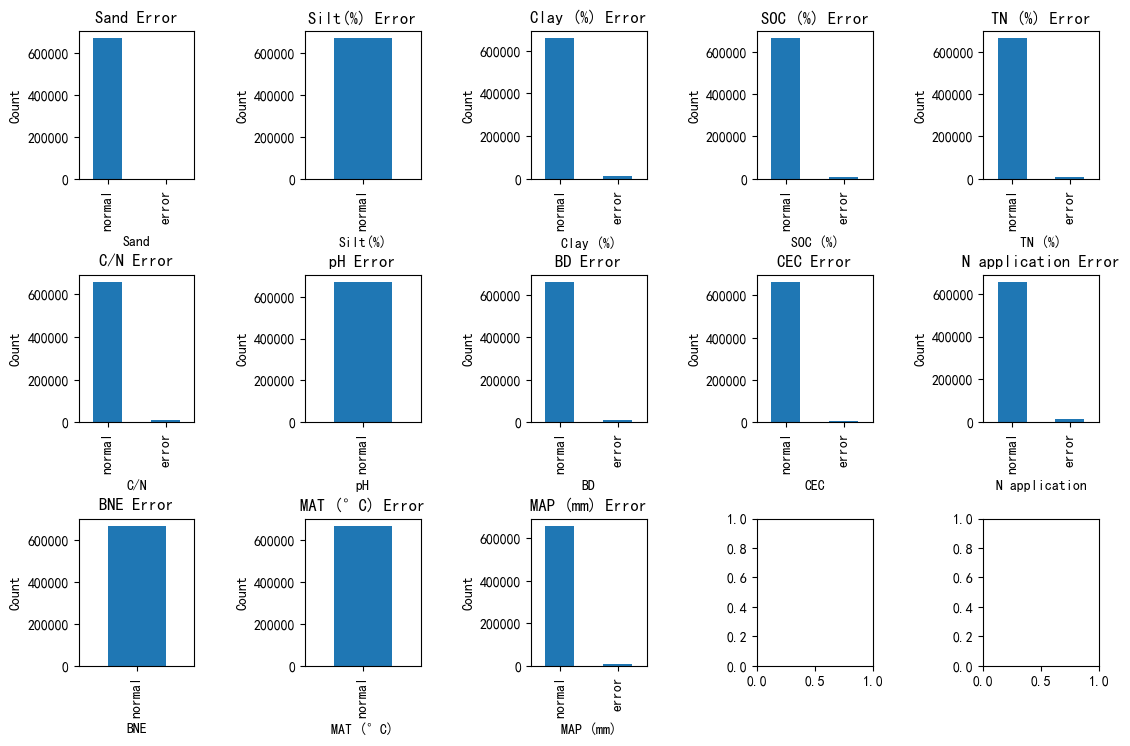

In [8]:
import math

# 查看每一列的异常值数量
error_train = data_all.copy()
# 计算要创建的子图网格的行数和列数
total_plots = len(numeric_factors)
rows = int(math.sqrt(total_plots))
cols = math.ceil(total_plots / rows)

# 创建一个包含所有子图的大图
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
fig.tight_layout(pad=5.0)  # 调整子图之间的间距
check_fea = numeric_factors
for i, fea in enumerate(check_fea):
    row, col = i // cols, i % cols
    ax = axes[row, col]
    error_train = find_outlines_by_3segama(error_train, fea)
    error_train[f'{fea}outlines'].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'{fea} Error')
    ax.set_xlabel(fea)
    ax.set_ylabel('Count')

In [9]:
# 将异常值填充为平均值
for fea in check_fea:
    condition = error_train[f'{fea}outlines'] == 'error'
    mean_value = data[fea].mean()
    data.loc[condition, fea] = mean_value

### 开始进行预测

In [10]:
for trg in target:
    save_path = save_file + f'/{data_name}_{trg}.xlsx'
    model_path = f'{output_file}/model_{trg}/lgb_model.pkl'

    from lightgbm import LGBMRegressor

    lgb_model = LGBMRegressor(objective='regression', num_leaves=31, learning_rate=0.05, n_estimators=20)

    lgb_model = joblib.load(model_path)
    y = lgb_model.predict(data, num_iteration=lgb_model.best_iteration_)

    data_all[trg] = y
    data_all.to_excel(save_path, index=False)
    display(data_all.head(10))

,OBJECTID,Longitude,Latitude,Crop type,Sand,Silt(%),Clay (%),BD,pH,SOC (%),TN (%),C/N,CEC,MAT (°C),MAP (mm),BNE,N application,EF
0,1,-74.708333,-50.958333,3,52,28,20,1.29,7.1,1.319,0.158,10,14,8.960834,2641.540039,1,0.554,1.398877
1,2,-74.541667,-50.958333,3,52,28,20,1.29,7.1,1.319,0.158,10,14,8.960834,2641.540039,1,0.554,1.398877
2,3,-74.458333,-50.958333,3,52,28,20,1.29,7.1,1.319,0.158,10,14,8.822500,2458.050049,1,0.674,1.398877
3,4,-74.125000,-50.958333,3,52,28,20,1.29,7.1,1.319,0.158,10,14,8.822500,2458.050049,1,0.674,1.398877
4,5,-74.041667,-50.958333,3,52,28,20,1.29,7.1,1.319,0.158,10,14,8.822500,2458.050049,1,0.674,1.398877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670021,687506,26.041667,64.125000,3,54,40,6,1.08,4.7,7.217,0.400,18,25,4.915833,615.700012,1,6.505,1.370283
670022,687507,26.458333,64.125000,3,54,40,6,1.08,4.7,7.217,0.400,18,25,4.915833,615.700012,1,6.505,1.370283
670023,687508,26.708333,64.125000,3,54,40,6,1.08,4.7,7.217,0.400,18,25,4.850833,652.049988,1,8.962,1.455991
670024,687509,26.958333,64.125000,3,54,40,6,1.08,4.7,7.217,0.400,18,25,4.850833,652.049988,1,8.962,1.455991


,OBJECTID,Longitude,Latitude,Crop type,Sand,Silt(%),Clay (%),BD,pH,SOC (%),TN (%),C/N,CEC,MAT (°C),MAP (mm),BNE,N application,EF,LN(EF)
0,1,-74.708333,-50.958333,3,52,28,20,1.29,7.1,1.319,0.158,10,14,8.960834,2641.540039,1,0.554,1.398877,0.317042
1,2,-74.541667,-50.958333,3,52,28,20,1.29,7.1,1.319,0.158,10,14,8.960834,2641.540039,1,0.554,1.398877,0.317042
2,3,-74.458333,-50.958333,3,52,28,20,1.29,7.1,1.319,0.158,10,14,8.822500,2458.050049,1,0.674,1.398877,0.317042
3,4,-74.125000,-50.958333,3,52,28,20,1.29,7.1,1.319,0.158,10,14,8.822500,2458.050049,1,0.674,1.398877,0.317042
4,5,-74.041667,-50.958333,3,52,28,20,1.29,7.1,1.319,0.158,10,14,8.822500,2458.050049,1,0.674,1.398877,0.317042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670021,687506,26.041667,64.125000,3,54,40,6,1.08,4.7,7.217,0.400,18,25,4.915833,615.700012,1,6.505,1.370283,-0.544422
670022,687507,26.458333,64.125000,3,54,40,6,1.08,4.7,7.217,0.400,18,25,4.915833,615.700012,1,6.505,1.370283,-0.544422
670023,687508,26.708333,64.125000,3,54,40,6,1.08,4.7,7.217,0.400,18,25,4.850833,652.049988,1,8.962,1.455991,-0.544422
670024,687509,26.958333,64.125000,3,54,40,6,1.08,4.7,7.217,0.400,18,25,4.850833,652.049988,1,8.962,1.455991,-0.544422
